<a href="https://colab.research.google.com/github/thargro5/Machine-Learning/blob/main/MLHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

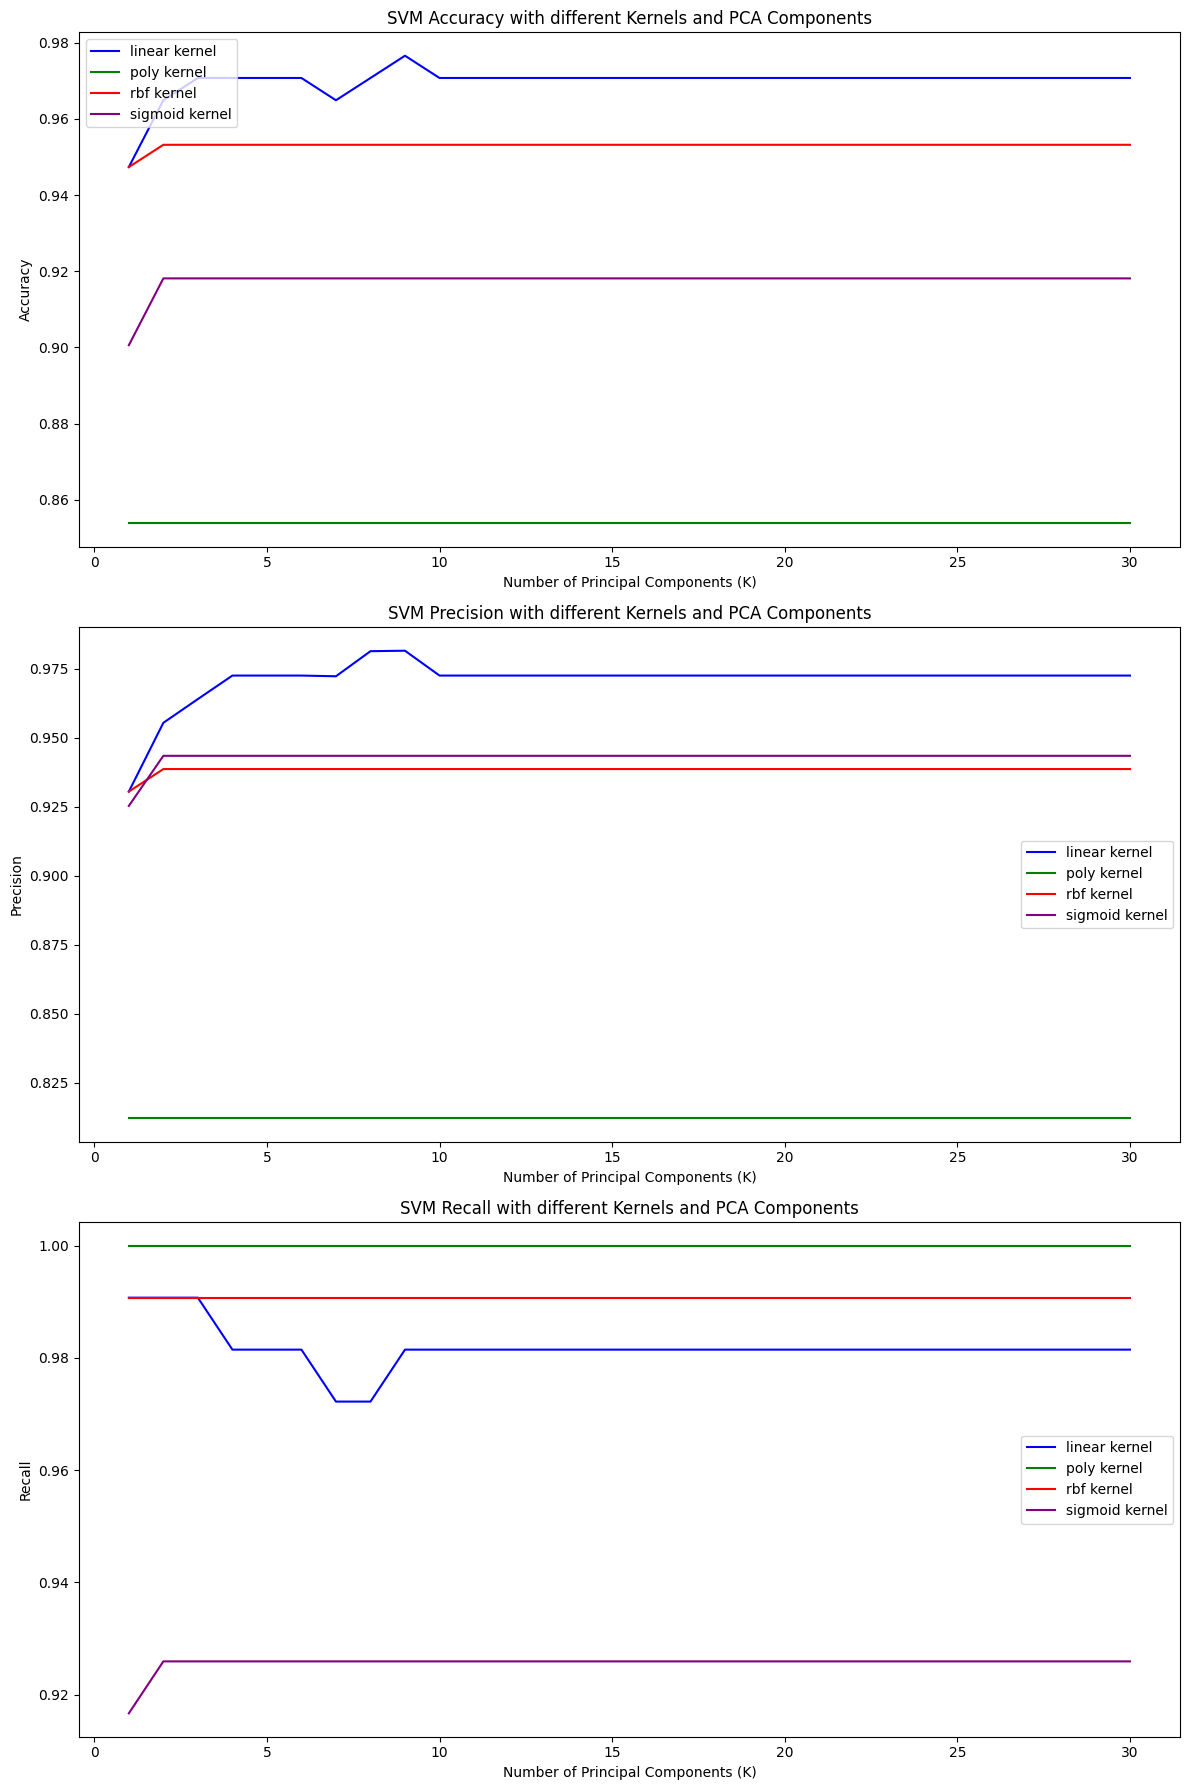

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of principal components and kernels to test
K_values = range(1, X.shape[1] + 1)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {kernel: {'accuracy': [], 'precision': [], 'recall': []} for kernel in kernels}

# Train and evaluate SVM classifiers with diff kernels and number of principal components
for kernel in kernels:
    for k in K_values:
        # Apply PCA with k
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM with specified kernel
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_pca, y_train)

        # predictions
        y_pred = svm.predict(X_test_pca)

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Store results
        results[kernel]['accuracy'].append(accuracy)
        results[kernel]['precision'].append(precision)
        results[kernel]['recall'].append(recall)

# Plot
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
metrics = ['accuracy', 'precision', 'recall']
colors = ['b', 'g', 'r', 'purple']

for i, metric in enumerate(metrics):
    for j, kernel in enumerate(kernels):
        axes[i].plot(K_values, results[kernel][metric], label=f'{kernel} kernel', color=colors[j])
    axes[i].set_xlabel('Number of Principal Components (K)')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].legend()
    axes[i].set_title(f'SVM {metric.capitalize()} with different Kernels and PCA Components')

plt.tight_layout()
plt.show()

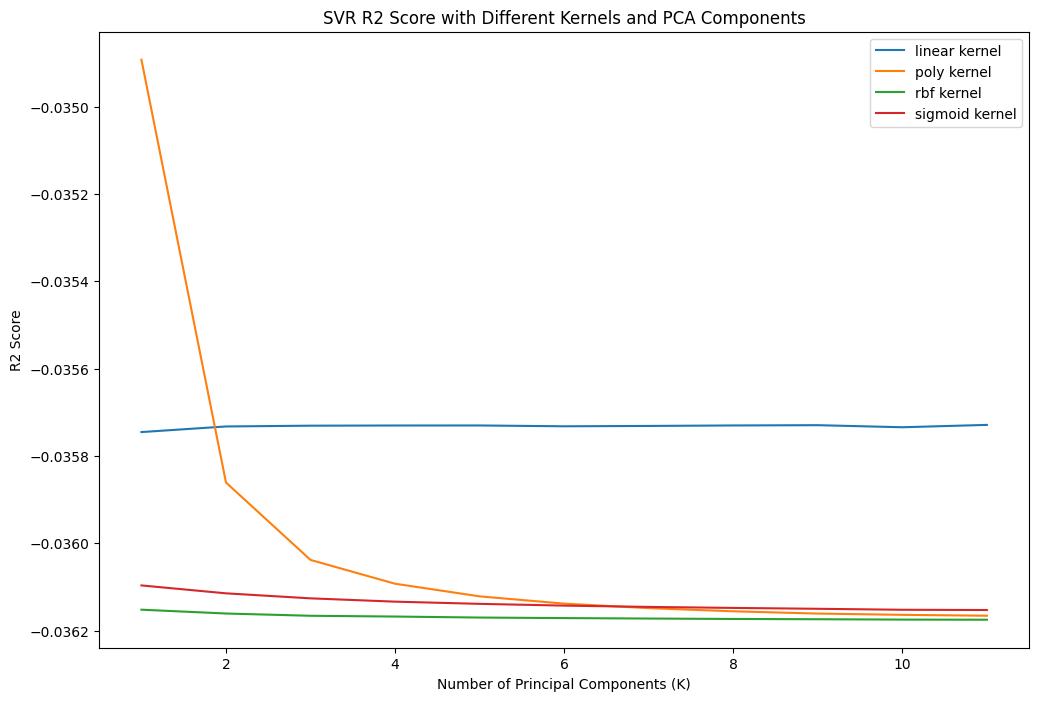

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load dataset
data = pd.read_csv("https://github.com/HamedTabkhi/Intro-to-ML/raw/main/Dataset/Housing.csv")

# Convert 'yes'/'no' to 1/0 for all relevant columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_columns] = data[binary_columns].apply(lambda col: col.map({'yes': 1, 'no': 0}))

# Extract features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
          'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']


# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Range of components and kernels to test
K_values = range(1, X.shape[1] + 1)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# store R2 scores for diff K and kernel values
results = {kernel: {'r2_score': []} for kernel in kernels}

# Train and evaluate SVR with kernels and diff number of principal components
for kernel in kernels:
    for k in K_values:
        # Apply PCA with k components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Train SVR
        svr = SVR(kernel=kernel)
        svr.fit(X_train_pca, y_train)

        # Predict
        y_pred = svr.predict(X_test_pca)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results[kernel]['r2_score'].append(r2)

# Plot the R2 scores over values of K
plt.figure(figsize=(12, 8))
for kernel in kernels:
    plt.plot(K_values, results[kernel]['r2_score'], label=f'{kernel} kernel')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('R2 Score')
plt.title('SVR R2 Score with Different Kernels and PCA Components')
plt.legend()
plt.show()